In [1]:
import tensorflow as tf

from tensorflow import keras

In [2]:
print(tf.__version__, ' ', tf.keras.__version__)

2.3.0   2.4.0


----

## 5.200 Training a convent on a small dataset

Small means dataset sizes of a few hundreds to a few tens of thousands of images

A common computer vision situation

Example: cat or dog? 

The Dogs vs Cats dataset has 4000 images of cats and dogs (2000 cats, 2000 dogs)

Split: 2000 images for training, 1000 for validation, 1000 for testing

Train a small convnet on our 2000 training samples, without any regularization, to set a baseline for what can be 
achieved 

We will find a baseline classification accuracy of $\approx$71%

At that point, our main issue will be overfitting

We will fight overfitting with *data augmentation* and reach an accuracy of 82%

Then we will review two more essential small dataset, computer vision, deep learning techniques: 
- feature extraction with a pretrained network 
- => 90% to 93% accuracy
- fine-tuning a pretrained network 
- => 95% final accuracy

----

## 5.210 DL and  small-data problems

DL requires masses of data?

Basically correct - DL replaces time consuming manual feature engineering with automatic training - and this usually requires large datasets

Especially true for high dimensional inputs

What size of dataset is sufficient?

Sufficiency depends on the size and depth of the network and the difficulty and the complexity of the task

Training on a few hundred samples is feasible if
- the network is small and regularised
- the task is simple

Training a convnet from scratch on a very small image dataset is indeed feasible because convnets are very efficient

This is because convnets learn spatially invariant features (so the training set does not need to include all translations of a particular object)

DL models are very malleable: an image classification or speech-to-text model trained on a large-scale dataset can be reused on a significantly different problem with only minor changes 

Many pretrained computer vision models (usually trained on the ImageNet dataset) are now publicly available and can bootstrap powerful CV models out of very little data

Despite being trained on a different image dataset, these pretrained models are useful because spatial features tend to be generic (edges, corners etc)

That's what we are about demonstrate

For now, let's get started by getting our hands on the data.

----

## 5.220 Downloading cats and dogs

Dogs vs Cats dataset is not packaged with Tensorflow

The dataset is available at `https://www.kaggle.com/c/dogs-vs-cats/data` 

The images are medium-resolution color JPEGs

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

The Dogs vs Cats Kaggle competition in 2013 was won by convnet models that could be mistaken as little as once in every twenty pictures 

This original dataset contains 25,000 images of dogs and cats (12,500 from each class). 

Let's see if a convnet can distinguish a cat from a dog with a very limited dataset

- 2000 training samples 
- 1000 verification samples 
- 1000 test samples

All three sub-datasets have an equal dog:cat split 

In [3]:
import os, shutil

In [6]:
# RUN THIS CELL IF YOU NEED TO MAKE THE SMALLER DATASET

# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/Users/timblackwell/Documents/Goldsmiths/2021/Data Science/data/dogs-vs-cats/train'

# The directory where we will store our smaller dataset
base_dir = '/Users/timblackwell/Documents/Goldsmiths/2021/Data Science/data/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# RUN THIS CELL IF THE SMALLER DATASET ALREADY EXISTS

base_dir = '/Users/timblackwell/Documents/Goldsmiths/2021/Data Science/data/cats_and_dogs_small'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')


As a sanity check, let's count how many pictures we have in each sub-dataset:

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [8]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [9]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [10]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [11]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [12]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


This is a balanced binary classification problem

with a common sense baseline prediction accuracy of 50%

----

## 5.230 Building the network

Our convnet will be a stack of alternating `Conv2D` (with `relu` activation) and `MaxPooling2D` layers

The problem is more complex than the MNIST task (the images are bigger), so we expect the convnet will need to 
bigger

One more `Conv2D` + `MaxPooling2D` stage

- augments the capacity of the network
- reduces the size of the feature maps so that 
they too large when we reach the `Flatten` layer 

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

150 x 150 image input size (an arbitrary choice) is reduced to 7 x 7 

- the depth of the feature maps (number of channels/filters per layer) progressively increases (from 32 to 128)
- the size of the feature maps decreases (from 148 x 148 to 7 x 7)

Increasing depth and decreasing feature size is a common convnet architectural pattern

Binary classification problem - the network ends in a single sigmoid unit and outputs  the probability that the network is looking at one class or the other

Compilation: choose
- `RMSprop` optimizer, as usual, but with a smaller learning rate than the default value of 1e-3
- binary crossentropy loss 
- accuracy training metric

In [15]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

----

## 5.240 Data preprocessing

Data must be vectorised into floating point tensors

The data are JPEG files

- read the picture files
- decode the JPEG content to RGB grids of pixels
- convert to floating point tensors
- Rescale pixel values to $[0, 1]$

Many Processing helper tools in `keras.preprocessing.image` 

including an `ImageDataGenerator` which can automatically turn image files on disk into batches of preprocessed tensors

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The batch size (samples per batch) is set to 20

The generators yield batches of 150 x 150 RGB images (shape `(20, 150, 150, 3)`) and binary 
labels (shape `(20,)`)

`model.fit()` will accept training and validation generators

`fit` needs to know how many samples to draw before declaring an epoch over (because the data is being generated endlessly)

The epochs are controlled by the `steps_per_epoch` parameter

A 'step' is a single batch

`samples_per_epoch = steps_per_epoch * samples_per_batch`

We have chosen 20 sample batches, steps_per_epoch must be set to 100 (2000 = 100 x 20)

The fitting process will go to the next epoch after drawing `steps_per_epoch` batches from the generator - `steps_per_epoch` gradient descent steps 

The `validation_steps` parameter controls the number of batches to draw for evaluation: 50 validation batches x 20 samples per batch = 1000 samples

In [19]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 49s 488ms/step - loss: 0.3808 - acc: 0.8275 - val_loss: 0.6887 - val_acc: 0.6640
Epoch 2/30
100/100 [==============================] - 56s 563ms/step - loss: 0.3500 - acc: 0.8480 - val_loss: 0.6450 - val_acc: 0.7070
Epoch 3/30
100/100 [==============================] - 52s 517ms/step - loss: 0.3323 - acc: 0.8585 - val_loss: 0.5697 - val_acc: 0.7350
Epoch 4/30
100/100 [==============================] - 52s 518ms/step - loss: 0.3231 - acc: 0.8565 - val_loss: 0.5765 - val_acc: 0.7250
Epoch 5/30
100/100 [==============================] - 50s 498ms/step - loss: 0.2944 - acc: 0.8795 - val_loss: 0.6073 - val_acc: 0.7180
Epoch 6/30
100/100 [==============================] - 53s 533ms/step - loss: 0.2714 - acc: 0.8915 - val_loss: 0.6110 - val_acc: 0.7280
Epoch 7/30
100/100 [==============================] - 55s 552ms/step - loss: 0.2419 - acc: 0.9065 - val_loss: 0.5930 - val_acc: 0.7380
Epoch 8/30
100/100 [==============================] - 6

The model can be saved:

In [20]:
model.save('cats_and_dogs_small_1.h5')

Let's plot the loss and accuracy of the model over the training and validation data during training:

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

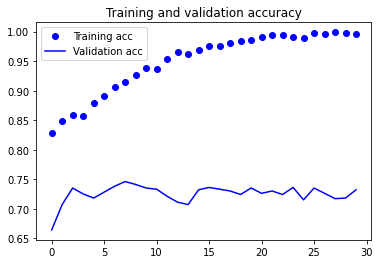

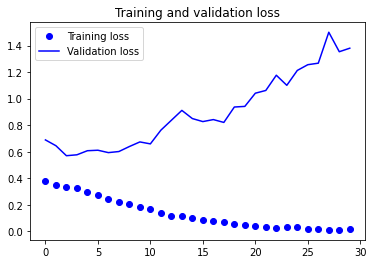

In [21]:
plt.show()

Gross overfitting! 

Training accuracy increases, reaching nearly 100%; validation accuracy stalls at about 72%

Training loss decreases to nearly zero; validation loss reaches its minimum in the first few epochs, then stalls 

Overfitting is going to be a primary concern because we only have relatively few training samples (2000)
 
We have seen that dropout and weight decay (L2 regularization) can mitigate overfitting 

Let's try a new scheme often used in DL computer vision models: *data augmentation*

----

## 5.250 Data augmentation

Overfitting is caused by having too few samples

Trained models are unable to generalize to new data

Exposing a model to every possible aspect of the data distribution would cure overfitting - but we would (generally) need infinite datasets

Getting more data is always the best strategy

But what if we are limited to a small dataset?

We could artificially generate more training data from the existing data

That is the approach of *data augmentation*

In this case: apply a random transformations in order to generate feasible images 

Then, at training, our model will never see the same image twice 

The model is exposed to more aspects of the data (but not different data) and may generalise better

The `ImageDataGenerator`is able to apply random transformations:

In [22]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

* `rotation_range` images by a random angle between 0 and 180 degrees
* `width_shift` and `height_shift` specify the ranges (as a fraction of total width or height) for image random vertical or horizomtal translation 
* `shear_range` determines random shears

* `zoom_range` - random zooming
* `horizontal_flip` is for random horizontal flips. Flips are relevant when there are no assumptions of horizontal 
asymmetry (e.g. real-world pictures)
* `fill_mode` - how to fill in any newly created pixels as a result of rotation or translation

Let's look at our augmented images:

In [ ]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

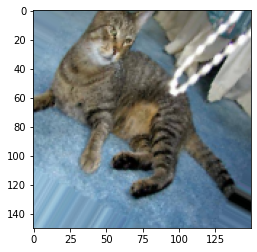

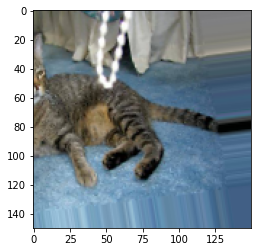

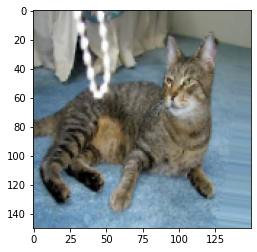

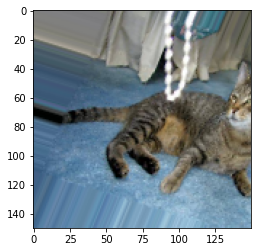

In [23]:
plt.show()

A new model will never see exactly the same image - so have we succeeded in creating an infinite training set?

Will the model see very possible cat or dog? 

No!

It is impossible to generate new information

We can only remix old information

So we might not completely eradicate overfitting

We might need other regularisation techniques

Let's add dropout to the classifier top end 

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Let's train our network using data augmentation and dropout:

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 49s 494ms/step - loss: 0.6792 - acc: 0.5740 - val_loss: 0.6597 - val_acc: 0.5990
Epoch 2/100
100/100 [==============================] - 51s 507ms/step - loss: 0.6755 - acc: 0.5925 - val_loss: 0.6667 - val_acc: 0.5950
Epoch 3/100
100/100 [==============================] - 50s 504ms/step - loss: 0.6660 - acc: 0.6130 - val_loss: 0.6784 - val_acc: 0.5410
Epoch 4/100
100/100 [==============================] - 51s 506ms/step - loss: 0.6514 - acc: 0.6215 - val_loss: 0.6906 - val_acc: 0.5550
Epoch 5/100
100/100 [==============================] - 53s 531ms/step - loss: 0.6488 - acc: 0.6240 - val_loss: 0.6270 - val_acc: 0.6350
Epoch 6/100
100/100 [==============================] - 52s 521ms/step - loss: 0.6339 - acc: 0.6475 - val_loss: 0.6096 - val_acc: 0.6550
Epoch 7/100
100/100 [==============================] - 53s 531ms/step - loss: 0.6229 - acc: 0.6405 -

Let's save our model -- we will be using it later for convnet visualization

In [29]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

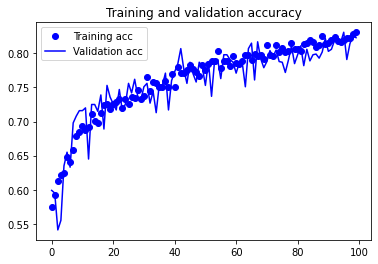

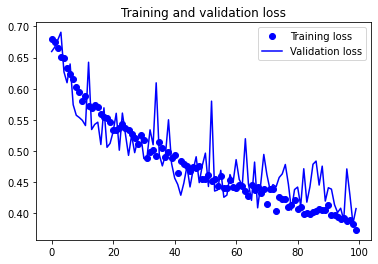

In [30]:
plt.show()

Success!

The validation curves are rather closely tracking the training curves

Augmentation and dropout seem to have prevented overfitting in this case

Accuracy has increased from 72% to 82%

Other regularisation techniques and hyper-parameter tuning can push the accuracy higher by a few per cent 

But the ultimate potential in training our own model from scratch is limited because of the paucity of the training set 

The next section shows how models that have been trained on different, larger, datasets, can be applied to the small-data problem

----

MIT Licence
 
Copyright (c) 2017-present François Chollet
 
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:
 
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
 
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.